Neural Network - CIFER10

Siec neuronowa sekwencyjna. Wszystko napiszę w notatce  i opisze

In [1]:
%load_ext tensorboard

import numpy as np 
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,Dropout,Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import tensorflow as tf

import datetime


In [2]:
#Hiperparametry
BATCH_SIZE = 64


In [3]:
#Pobranie datasetu
(X_train, y_train),(X_test,y_test) = cifar10.load_data()
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 1)
(50000, 1)


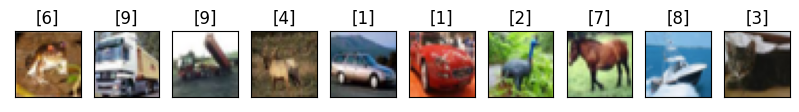

In [4]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical( num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical( num_classes=10))
y_test = np.array(temp)

print(y_train.shape)
print(y_test.shape)

#Stary kawałek kodu --- poniżej to samo tylko lepsze

In [5]:
#Stworzenie danych w formacie one hot (opisac co to). Generalnie nie wykorzystane bo inny model nauki jest (sparse_categorical_crossentropy) a nie (categorical_entropy)

y_train_one_hot = to_categorical(y_train,num_classes=10)
y_test_one_hot  = to_categorical(y_test, num_classes=10)
print(y_test_one_hot.shape)
# print(y_train_one_hot.shape)

(10000, 10)


In [6]:
#generowanie dodatkowych obrazków do nauki. Nie korzystać - testowanie
from keras.preprocessing.image import ImageDataGenerator
import os as os
train_generate = ImageDataGenerator(rescale = 1./255, #żeby pixele były widziane jako 0-1
                                width_shift_range=0.1, #losowość w szerokości 0.1 
                                height_shift_range=0.1, #losowość w długości 0.1
                                horizontal_flip =True, #losowe obracanie obrazka
                                vertical_flip=True) #losowe obrocenie obrazka

path_to_save = './photos/'

#for class_label in np.unique(y_train):
#    class_images = X_train[y_train.flatten() == class_label]
#    class_save_directory = os.path.join(path_to_save, str(class_label))
#    if not os.path.exists(class_save_directory):
#        os.makedirs(class_save_directory)

train_generated = train_generate.flow(X_train,y_train,batch_size=BATCH_SIZE)
    
    #for i in range(10):
    #    batch = train_generated.next()


#Generowanie dodatkowych obrazków do walidacji

test_generate = ImageDataGenerator(rescale= 1./255)
test_generated = train_generate.flow(X_test,y_test,batch_size=BATCH_SIZE)




In [7]:
train_generated

# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(train_generated[i])
    axes[i].imshow(train_generated[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [9]:
#siec neuronowa

model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(81,activation='relu'))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(27,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)          0         
 D)                                                              
                                                                 
 flatten_4 (Flatten)         (None, 5184)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               663680    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                      

In [30]:
#kompilacja modelu - optimizer Nadam (opisac)

from keras.optimizers import Nadam

optimizer = Nadam(lr=0.005)




In [31]:

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['sparse_categorical_accuracy']) #sparse_categorical_crossentropy

In [32]:
checkpoint  = ModelCheckpoint(filepath='my_best_model.epoch_01-loss_13.32.hdf5' ,monitor='val_loss', verbose=1,save_best_only=True,mode='min')
checkpoint2 = TensorBoard(log_dir='./logs')
callback = [checkpoint,checkpoint2]
model.fit_generator(
          train_generated,
          steps_per_epoch=len(X_train)//BATCH_SIZE,
          epochs=25,    
          validation_data=test_generated,
          validation_steps=len(X_test)//BATCH_SIZE
          #callbacks=callback
          )


print("Skonczone")

Epoch 1/25


C:\Users\MAXJ\AppData\Local\Temp\ipykernel_2228\2542676424.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


781/781 [==============================] - 105s 129ms/step - loss: 1.5790 - sparse_categorical_accuracy: 0.4122 - val_loss: 1.4135 - val_sparse_categorical_accuracy: 0.4804
Epoch 2/25
781/781 [==============================] - 96s 123ms/step - loss: 1.5003 - sparse_categorical_accuracy: 0.4572 - val_loss: 1.3429 - val_sparse_categorical_accuracy: 0.5121
Epoch 3/25
781/781 [==============================] - 97s 124ms/step - loss: 1.4379 - sparse_categorical_accuracy: 0.4848 - val_loss: 1.3217 - val_sparse_categorical_accuracy: 0.5378
Epoch 4/25
781/781 [==============================] - 103s 132ms/step - loss: 1.3961 - sparse_categorical_accuracy: 0.5021 - val_loss: 1.2701 - val_sparse_categorical_accuracy: 0.5450
Epoch 5/25
781/781 [==============================] - 112s 144ms/step - loss: 1.3678 - sparse_categorical_accuracy: 0.5173 - val_loss: 1.2433 - val_sparse_categorical_accuracy: 0.5497
Epoch 6/25
781/781 [==============================] - 102s 130ms/step - loss: 1.3398 - sparse

KeyboardInterrupt: 

In [ ]:
#od tej sekcji mamy przygotowanie zdjecia i predykcje

from keras.preprocessing import image
img = image.load_img('./test4.png',target_size=(32,32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)
img_array /= 255

import cv2 

# read the image file 
file ='./test.png'
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE) 


imag = cv2.resize(img,(32,32),interpolation=cv2.INTER_LINEAR)

imag = imag.astype('float32')

imag = imag.reshape (1,32,32,1)
imag = 255-imag
imag /= 255

In [ ]:

predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 0s 27ms/step
[[0.01119841 0.01157047 0.13067922 0.17988895 0.24045995 0.06508008
  0.30120316 0.03128028 0.00684544 0.02179403]]


In [ ]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[6]


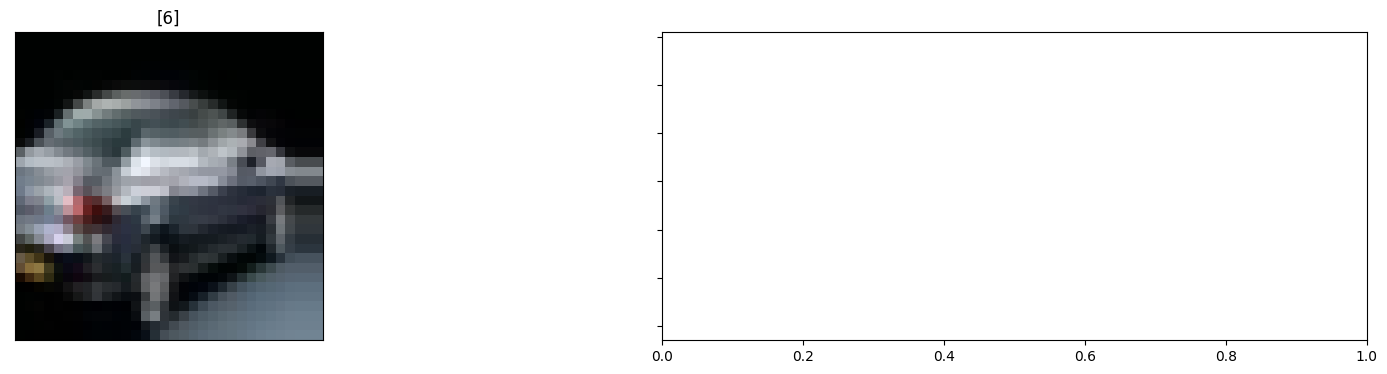

In [ ]:
fig, axes = plt.subplots(ncols=2, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(1):
    axes[i].set_title(predictions)
    axes[i].imshow(img)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
